In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [4]:
def fx(mu,sigma,x):
    return 1/(2*math.pi*sigma)*math.exp((-(x-mu)**2)/2*sigma**2)

mu=1.5
sigma=1

setA=np.random.normal(-mu,sigma,1000)
setB=np.random.normal(mu,sigma,1000)

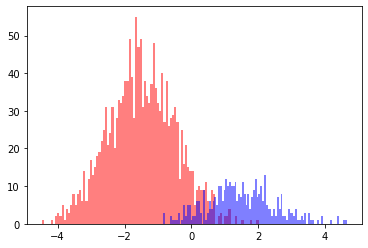

In [25]:
plt.hist(setA,100,color=[1,0,0,0.5])
plt.hist(setB,100,color=[0,0,1,0.5])
plt.show()

对于最小错误贝叶斯决策，我们对数据的既有分布趋势较为清楚，即知晓$P(\omega_i)$与$P(x|\omega_i)$的情况下求$P(\omega_i|x)$。

其中$P(\omega_i)$为$\omega_i$的先验概率，即经验或者统计告诉我们的事情发生的可能性。
$P(x|\omega_i)$为$x$在$\omega_i$下的条件概率，即出现$\omega_i$时，有多少可能表现为$x$。

贝叶斯公式为
$$P(\omega_i|x)=\frac{P(x|\omega_i)*P(\omega_i)}{\sum_{j=1}^M P(x|\omega_j)*P(\omega_j)}$$

对于 -2 与 0.3 两点，有

In [26]:
p1a=(fx(-mu,sigma,-2)*0.5)/(fx(-mu,sigma,-2)*0.5+fx(mu,sigma,-2)*0.5)
p1b=(fx(mu,sigma,-2)*0.5)/(fx(-mu,sigma,-2)*0.5+fx(mu,sigma,-2)*0.5)
print('P1a={}, P1b={}'.format(p1a,p1b))

P1a=0.9975273768433652, P1b=0.0024726231566347743


In [27]:
p2a=(fx(-mu,sigma,0.3)*0.5)/(fx(-mu,sigma,0.3)*0.5+fx(mu,sigma,0.3)*0.5)
p2b=(fx(mu,sigma,0.3)*0.5)/(fx(-mu,sigma,0.3)*0.5+fx(mu,sigma,0.3)*0.5)
print('P2a={}, P2b={}'.format(p2a,p2b))

P2a=0.289050497374996, P2b=0.710949502625004


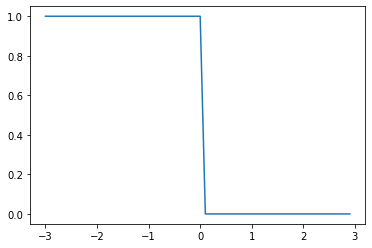

In [29]:
judge=[]
for i in np.arange(-3,3,0.1):
    if((fx(-mu,sigma,i)*0.5)/(fx(-mu,sigma,i)*0.5+fx(mu,sigma,i)*0.5))>(fx(mu,sigma,i)*0.5)/(fx(-mu,sigma,i)*0.8+fx(mu,sigma,i)*0.5):
        judge.append(1)
    else:
        judge.append(0)
plt.plot(np.arange(-3,3,0.1),judge)
plt.show()

通过比较$P_ia$与$P_ib$的数据，我们可以选出更有可能的类别，但以上讨论只针对了出现概率相等的条件。若出现概率不等，则有一定差别。

In [8]:
setA=np.random.normal(-mu,sigma,1600)
setB=np.random.normal(mu,sigma,400)

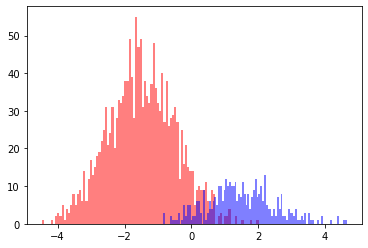

In [9]:
plt.hist(setA,100,color=[1,0,0,0.5])
plt.hist(setB,100,color=[0,0,1,0.5])
plt.show()

In [23]:
p1a=(fx(-mu,sigma,-2)*0.8)/(fx(-mu,sigma,-2)*0.8+fx(mu,sigma,-2)*0.2)
p1b=(fx(mu,sigma,-2)*0.2)/(fx(-mu,sigma,-2)*0.8+fx(mu,sigma,-2)*0.2)
print('P1a={}, P1b={}'.format(p1a,p1b))

P1a=0.9993806957312844, P1b=0.0006193042687155651


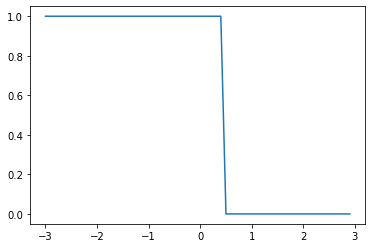

In [24]:
judge=[]
for i in np.arange(-3,3,0.1):
    if((fx(-mu,sigma,i)*0.8)/(fx(-mu,sigma,i)*0.8+fx(mu,sigma,i)*0.2))>(fx(mu,sigma,i)*0.2)/(fx(-mu,sigma,i)*0.8+fx(mu,sigma,i)*0.2):
        judge.append(1)
    else:
        judge.append(0)
plt.plot(np.arange(-3,3,0.1),judge)
plt.show()

In [11]:
p2a=(fx(-mu,sigma,0.3)*0.8)/(fx(-mu,sigma,0.3)*0.8+fx(mu,sigma,0.3)*0.2)
p2b=(fx(mu,sigma,0.3)*0.2)/(fx(-mu,sigma,0.3)*0.8+fx(mu,sigma,0.3)*0.2)
print('P2a={}, P2b={}'.format(p2a,p2b))

P2a=0.6192330908212066, P2b=0.38076690917879347


此时，数据分布没有改变，与上例同样的方差与均值，但$P_ia$与$P_ib$的大小关系却改变了。

即因为数据出现的概率不相等，因而其全概率也发生变化。